In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.zeros(139306)
with h5py.File("C:/Users/Admin/ipynb/datasets/quark-gluon_data-set_n139306.hdf5", "r") as f:
    m0 = np.array(f['m0'])
    pt = np.array(f['pt'])
    y = np.array(f['y'])
    ls = list(f)
    print(ls)
    print(f"shape of m0{m0.shape} and the data within",m0)
    print()
    print(f"shape of pt{pt.shape} and the data within",pt)
    print()
    print(f"shape of y{y.shape} and the data within",y)
    print()
    print(f['X_jets'].shape)
    x = m0
print(np.unique(x))

['X_jets', 'm0', 'pt', 'y']
shape of m0(139306,) and the data within [25.23232  22.109575 12.492149 ... 21.126598 18.291693 25.994074]

shape of pt(139306,) and the data within [107.45191 133.12431  88.46564 ... 138.59332  78.08985 118.20437]

shape of y(139306,) and the data within [0. 0. 1. ... 0. 0. 0.]

(139306, 125, 125, 3)
[ 3.3729308  3.471648   3.6719706 ... 74.66423   74.992035  75.95049  ]


(500, 125, 125, 3)
(125, 125, 3)


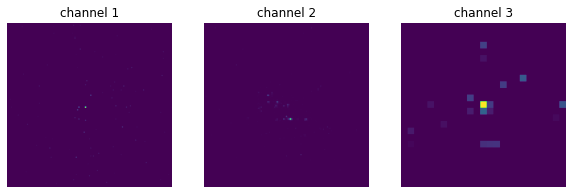

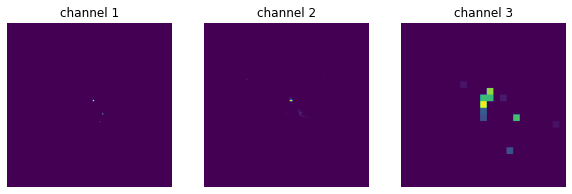

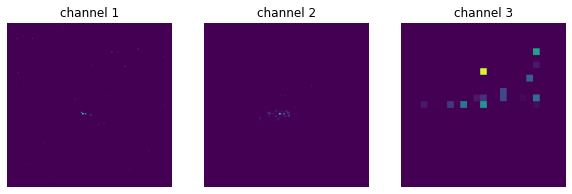

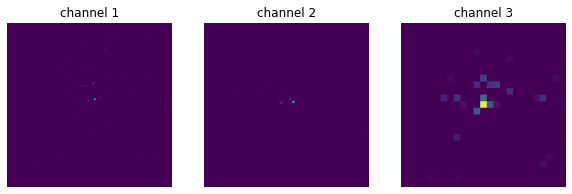

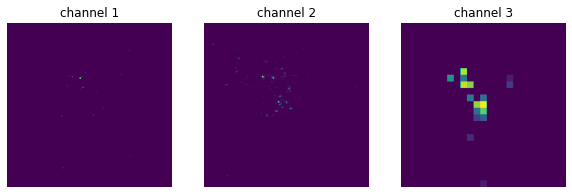

In [3]:
with h5py.File("C:/Users/Admin/ipynb/datasets/quark-gluon_data-set_n139306.hdf5", "r") as f:
    y = np.array(f['X_jets'][0:500])
    print(y.shape)
    z = y[0]
    print(z.shape)
    for j in range(5):
        z = y[j]
        fig,axes = plt.subplots(1,3, figsize = (10,10))
        for i,ax in enumerate(axes.flat):
            ax.axis('off')
            ax.set_title(f"channel {1+i}")
            ax.imshow(z[:,:,i])

(10000, 125, 125, 3)
(10000, 125, 125, 3)


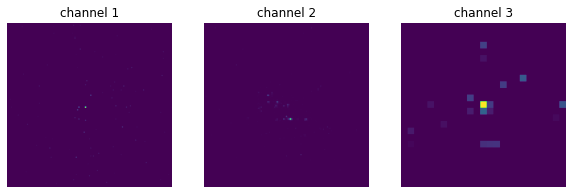

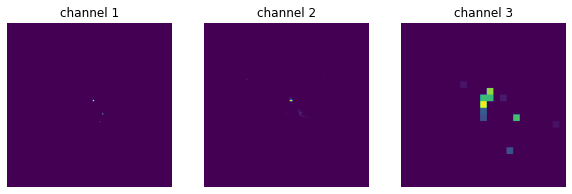

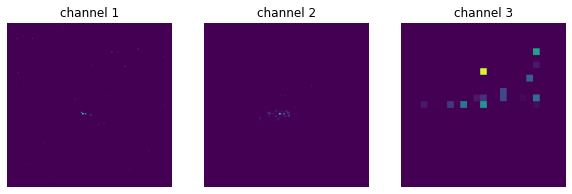

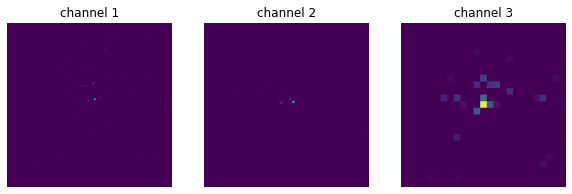

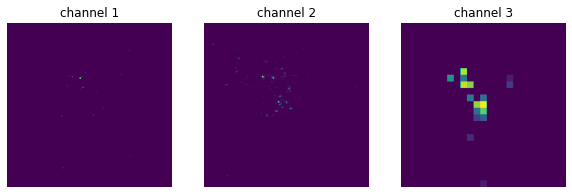

In [4]:
out = np.zeros([125,125])
#print(out.shape)
with h5py.File("C:/Users/Admin/ipynb/datasets/quark-gluon_data-set_n139306.hdf5", "r") as f:
    y = np.array(f['X_jets'][0:10000])
    print(y.shape)
    z = y[0]
    #print(z.shape)
    out = y
    for j in range(5):
        z = y[j]
        fig,axes = plt.subplots(1,3, figsize = (10,10))
        for i,ax in enumerate(axes.flat):
            ax.axis('off')
            ax.set_title(f"channel {1+i}")
            ax.imshow(z[:,:,i])
print(out.shape)

In [5]:
print(out.shape)

(10000, 125, 125, 3)


In [6]:
train = np.zeros([10000,15625])
for i in range(len(out)):
    train[i] = out[i,:,:,2].reshape(15625,)
print(np.unique(train))

[0.00000000e+00 1.00063889e-05 1.00074521e-05 ... 1.57292426e-01
 2.73980290e-01 3.59796613e-01]


In [7]:
import keras
from keras import layers

In [ ]:
#much to improve as there is error in the simple auto encoder

In [8]:
#auto encoder
encoding_dim = 640

input_img = keras.Input(shape = (15625,))

encoded = layers.Dense(encoding_dim, activation = 'relu')(input_img)

decoded = layers.Dense(15625,activation = 'sigmoid')(encoded)

autoencode = keras.Model(input_img,decoded)

In [9]:
#encoding layer
encoder = keras.Model(input_img,encoded)

In [10]:
encoded_input = keras.Input(shape=(encoding_dim,))

decoder_layer = autoencode.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [11]:
autoencode.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
autoencode.fit(train, train,
                epochs=2,
                shuffle=True,
                )

Epoch 1/2
313/313 [==============================] - 80s 252ms/step - loss: 0.1356
Epoch 2/2
313/313 [==============================] - 79s 252ms/step - loss: 0.0017


In [13]:
encoded_imgs = encoder.predict(train)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 7s 23ms/step


(10000, 15625)


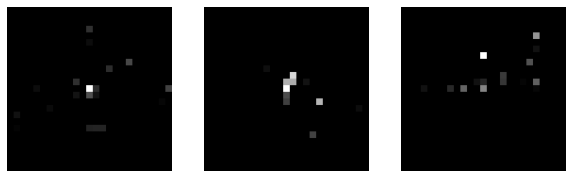

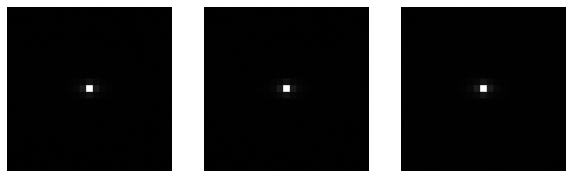

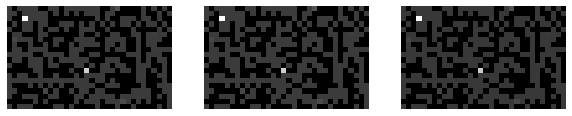

In [21]:
print(decoded_imgs.shape)
fig,axes = plt.subplots(1,3, figsize = (10,10))
for i,ax in enumerate(axes.flat):
    ax.axis('off')
    #ax.set_title(f"channel {1+i}")
    ax.imshow(train[i].reshape(125,125), cmap = 'gray')
fig,axes = plt.subplots(1,3, figsize = (10,10))
for i,ax in enumerate(axes.flat):
    ax.axis('off')
    #ax.set_title(f"channel {1+i}")
    ax.imshow(decoded_imgs[i].reshape(125,125), cmap = 'gray')
fig,axes = plt.subplots(1,3, figsize = (10,10))
for i,ax in enumerate(axes.flat):
    ax.axis('off')
    #ax.set_title(f"channel {1+i}")
    ax.imshow(encoded_imgs[i].reshape(20,32), cmap = 'gray')

In [15]:
# let me try for making an autoencoder for each channel....